<a href="https://colab.research.google.com/github/GiX7000/10-machine-learning-algorithms-from-scratch/blob/main/08_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of a Support Vector Machine classifier

In this notebook, a quick and simple implementation of a **binary** [SVM](https://www.youtube.com/watch?v=_YPScrckx28) classifier is presented. For deeper understanding, have a look first [here](https://www.youtube.com/watch?v=gUzEN2TxnxE) and then [here](https://www.youtube.com/watch?v=lDwow4aOrtg).

In [ ]:
# imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

## 1. Create a dataset and split it to train and test sets.

In [ ]:
# make a classification dataset
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=4)

# make sure that the classes are 2: -1 and 1
y = np.where(y == 0, -1, 1)

# split iiit to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# let's see some things about the data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.dtype, X_test.dtype)
print(X_train[5])
print(y_train[5])
print(np.unique(y_train))

(40, 2) (40,) (10, 2) (10,)
float64 float64
[9.50472036 4.49439839]
1
[-1  1]


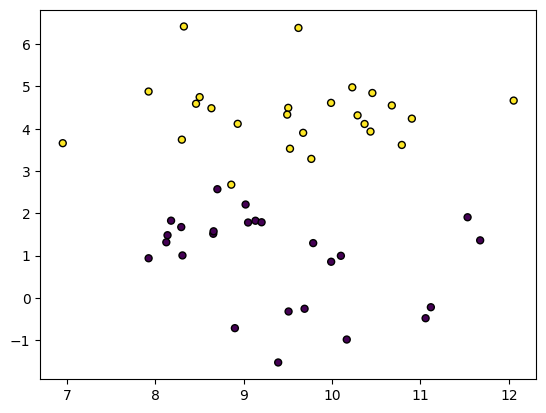

In [ ]:
# plot the data
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

## 2. Create a custom SVM model.

In [ ]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features) # try init w and b randomly
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                # apply update rules
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

## 3. Train, predict and evaluate the model.

In [ ]:
# create ana instance of our classifier
clf_svm = SVM()

# train the classifier
clf_svm.fit(X_train, y_train)

In [ ]:
# predict on test set
predictions = clf_svm.predict(X_test)

# Print the predictions and the actual labels
print("Predictions:", np.array(predictions))
print("Actual Labels:", y_test)

Predictions: [-1.  1. -1. -1.  1.  1.  1.  1. -1. -1.]
Actual Labels: [-1  1 -1 -1  1  1  1  1 -1 -1]


Let's use how good our model is.

In [ ]:
# accuracy function
def accuracy(y_true, y_pred):
  return np.sum(y_true == y_pred) / len(y_true)

print(accuracy(y_test, predictions))

1.0


We got the perfect model of accuracy of 100%.
Let's visualize now the SVM hyperplane.

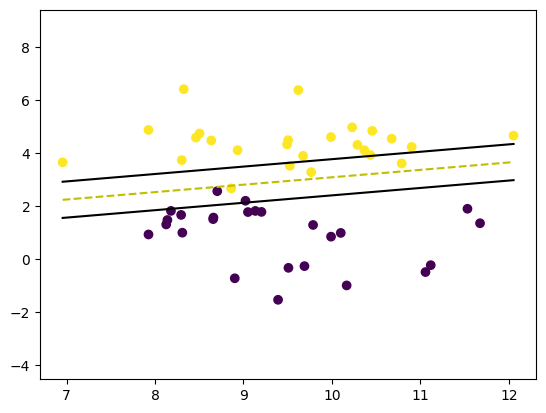

In [ ]:
# helper function to plot decision boundary and hyperplanes
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf_svm.w, clf_svm.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf_svm.w, clf_svm.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf_svm.w, clf_svm.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf_svm.w, clf_svm.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf_svm.w, clf_svm.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf_svm.w, clf_svm.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

# plot
visualize_svm()

## 4. Compare with the SVM classifier from scikit-learn library.

Let's see now, what results a [SVM classifier](https://scikit-learn.org/1.5/modules/svm.html) from scikit-learn library gives us.

In [ ]:
# let's compare now with the accuracy that sklearn gives us
from sklearn import svm

clf_sklearn = svm.SVC()
clf_sklearn.fit(X_train, y_train)
sklearn_predictions = clf_sklearn.predict(X_test)

In [ ]:
# let's check the accuracy now
print(accuracy(y_test, sklearn_predictions))

1.0


We got exactly the same high score of accuracy like our custom SVM classifier gave us. That's the way SVM classifiers work and we have to do now is to try it on different real big data.